# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
# Libraries

import pandas as pd
import numpy as np


# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [2]:
# your code here

employees = pd.read_csv('/Users/gracemartinez/Downloads/Employee.csv')

In [3]:
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [4]:
print(employees['Department'].unique())
len(employees['Department'].unique())

['IT' 'HR' 'Sales']


3

In [5]:
employees.pivot_table(index=["Department"])

# it will only display numerical values, not categorical.

,Salary,Years
Department,,
HR,45.00,4.666667
IT,48.75,4.500000
Sales,55.00,2.500000


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [51]:
# Method 1
# your code here

employees.pivot_table(index=["Department"], values=["Salary"])


,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [8]:
# another syntax:

employees.groupby(['Department']).agg({'Salary':'mean'})

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [26]:
# Method 2
# your code here


employees.groupby('Department').mean()



,Years,Salary
Department,,
HR,4.666667,45.00
IT,4.500000,48.75
Sales,2.500000,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [64]:
# your code here

employees.pivot_table(index=["Department", "Title"], values=["Salary"])

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

In [65]:
employees.pivot_table(index=["Department", "Title"], values=["Salary"], aggfunc=np.mean)

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [74]:
# your code here

employees.pivot_table(index=["Title"], values=["Years", "Salary"])

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [43]:
# your code here

employees.groupby('Department').mean()

,Years,Salary
Department,,
HR,4.666667,45.00
IT,4.500000,48.75
Sales,2.500000,55.00


In [44]:
employees.groupby('Title').mean()

,Years,Salary
Title,,
VP,8.00,70.000000
analyst,2.25,32.500000
associate,4.00,56.666667


In [47]:
employees[['Department']].count()

Department    9
dtype: int64

In [50]:
g = employees.groupby('Department')
g.count()

,Name,Education,Gender,Title,Years,Salary
Department,,,,,,
HR,3,3,3,3,3,3
IT,4,4,4,4,4,4
Sales,2,2,2,2,2,2


In [75]:
employees.groupby('Department').agg({'Title':'mean', 'Salary':'mean'})

DataError: No numeric types to aggregate

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [81]:
# your code here


# median for job Department & Title

employees.pivot_table(index=["Department", "Title"], values=["Salary"], aggfunc=np.median)

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

In [83]:
# median for job Title

employees.pivot_table(index=["Title"], values=["Salary"], aggfunc=np.median)


,Salary
Title,
VP,70.0
analyst,32.5
associate,55.0


In [84]:
# median for job Department

employees.pivot_table(index=["Department"], values=["Salary"], aggfunc=np.median)

,Salary
Department,
HR,35.0
IT,47.5
Sales,55.0


In [78]:
# min for job Department & Title

employees.pivot_table(index=["Department", "Title"], values=["Salary"], aggfunc=np.min)

Salary
Department Title            
HR         VP             70
           analyst        30
IT         VP             70
           analyst        30
           associate      60
Sales      associate      55

In [79]:
# max for job Department & Title

employees.pivot_table(index=["Department", "Title"], values=["Salary"], aggfunc=np.max)

Salary
Department Title            
HR         VP             70
           analyst        35
IT         VP             70
           analyst        35
           associate      60
Sales      associate      55

In [80]:
# standard deviation for job Department & Title

employees.pivot_table(index=["Department", "Title"], values=["Salary"], aggfunc=np.std)

,,Salary
Department,Title,
HR,analyst,3.535534
IT,analyst,3.535534
Sales,associate,0.000000


In [ ]:
"""
your commments here:


"""

#### Based on your comments, fill the missing values with an appropriate value.

In [ ]:
# your code here



#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [85]:
# your code here

employees.groupby(['Department']).agg({'Salary':'sum'})

,Salary
Department,
HR,135
IT,195
Sales,110


In [86]:
employees.Department.count()

9

#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [87]:
# your code here

employees.pivot_table(index=["Department", "Title"], values=["Years"], aggfunc=np.sum)

Years
Department Title           
HR         VP             8
           analyst        6
IT         VP             8
           analyst        3
           associate      7
Sales      associate      5

In [88]:
employees.pivot_table(index=["Department", "Title"], values=["Salary"], aggfunc=np.mean)

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [ ]:
# your code here



# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [89]:
# your code here


fitbit = pd.read_csv('/Users/gracemartinez/Downloads/Fitbit2.csv')

In [105]:
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [96]:
# your code here

fitbit.dtypes

Date                           object
Calorie burned                  int64
Steps                           int64
Distance                      float64
Floors                          int64
Minutes Sedentary             float64
Minutes Lightly Active          int64
Minutes Fairly Active           int64
Minutes Very Active             int64
Activity Calories               int64
MinutesOfSleep                  int64
MinutesOfBeingAwake             int64
NumberOfAwakings                int64
LengthOfRestInMinutes           int64
Distance_miles                float64
Days                           object
Days_encoded                  float64
Work_or_Weekend                 int64
Hours Sleep                   float64
Sleep efficiency              float64
Yesterday_sleep               float64
Yesterday_sleep_efficiency    float64
Months                         object
Months_encoded                  int64
dtype: object

In [97]:
fitbit.describe(include='all')

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
count,367,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367,367.000000
unique,366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN
top,2016-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Friday,NaN,NaN,NaN,NaN,NaN,NaN,March,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,54,NaN,NaN,NaN,NaN,NaN,NaN,31,NaN
mean,NaN,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,...,5.312180,NaN,3.010899,0.713896,4.841326,76.362799,4.818529,76.119842,NaN,6.501362
std,NaN,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,...,2.118801,NaN,1.998604,0.452555,2.579205,32.973194,2.584930,33.206279,NaN,3.459267
min,NaN,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000
25%,NaN,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,...,3.824539,NaN,1.000000,0.000000,3.733333,86.238532,3.725000,86.233673,NaN,3.500000
50%,NaN,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,...,5.151166,NaN,3.000000,1.000000,5.616667,89.433962,5.600000,89.433962,NaN,7.000000
75%,NaN,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,...,6.561678,NaN,5.000000,1.000000,6.675000,92.438419,6.650000,92.438419,NaN,9.500000


In [101]:
fitbit.describe(include=[np.number])

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,...,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months_encoded
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,...,16.196185,321.343324,5.312180,3.010899,0.713896,4.841326,76.362799,4.818529,76.119842,6.501362
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,...,10.757622,170.786726,2.118801,1.998604,0.452555,2.579205,32.973194,2.584930,33.206279,3.459267
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,...,7.000000,248.000000,3.824539,1.000000,0.000000,3.733333,86.238532,3.725000,86.233673,3.500000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,...,16.000000,370.000000,5.151166,3.000000,1.000000,5.616667,89.433962,5.600000,89.433962,7.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,...,24.000000,440.500000,6.561678,5.000000,1.000000,6.675000,92.438419,6.650000,92.438419,9.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,...,45.000000,607.000000,12.707037,6.000000,1.000000,9.216667,100.000000,9.216667,100.000000,12.000000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [102]:
# your code here

fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062608

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [103]:
import matplotlib.pyplot as plt;

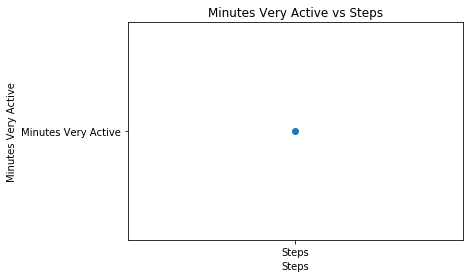

In [110]:
"""
plt.scatter(#,#)
plt.title(#)
plt.xlabel(#)
plt.ylabel(#)
plt.show()
"""

plt.scatter('Steps', 'Minutes Very Active')
plt.title('Minutes Very Active vs Steps')
plt.xlabel('Steps')
plt.ylabel('Minutes Very Active')
plt.show()

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
your commments here
"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [ ]:
# your code here

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

In [ ]:
# your code here

In [ ]:
"""
your commments here
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [ ]:
# your code here

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

In [ ]:
# your code here

In [ ]:
"""
your commments here
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [ ]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [ ]:
# your code here

#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [ ]:
# your code here

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [121]:
# your code here

time_grades= pd.read_excel('/Users/gracemartinez/Downloads/timeGrades.xlsx')

In [122]:
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the `time_grades` dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a24db10>,
      dtype=object)

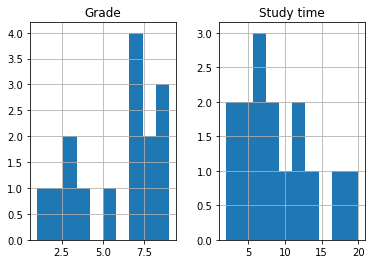

In [123]:
# your code here

time_grades.hist()

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [124]:
# your code here

time_grades.corr(method ='pearson')

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [134]:
time_grades.corr(method ='spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


In [ ]:
"""
your commments here
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

In [136]:
# your code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [138]:
x1 = Study time
x2 = Grade

# legend
plt.plot(x1, x2, label='linear')
plt.plot(x1, x2**2, label='quadratic')

#manipulate the axis
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.title("Study time vs Grade")
plt.legend() # calling what we wrote on the top

plt.show()



SyntaxError: invalid syntax (<ipython-input-138-88cad6986485>, line 1)

In [ ]:
"""
your commments here
"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
your commments here
"""